# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/MyDrive/PHYS6060/ML_strategy/')

!pip install wandb

from data import Data
from ML_Models import *

Mounted at /content/gdrive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [2]:
path = "/content/gdrive/MyDrive/PHYS6060/ML_strategy/"

# Check Feature Correlations

In [28]:
# load the features
ticker = "SPY"
start = datetime.datetime(1994,1,25)
end = datetime.datetime(2002,1,1)
data = Data(tickers=[ticker], start=start, end=end)

FEATURES, TARGET = data.feature_matrix(ticker, target='binary', leak=False, scale=True)


[*********************100%%**********************]  1 of 1 completed


In [24]:
data.historical['SPY']

,Open,High,Low,Close,Adj_close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.941387,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.118782,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.172005,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.438097,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.544533,531500
...,...,...,...,...,...,...
2023-12-08,457.459991,460.750000,457.209991,460.200012,460.200012,83080900
2023-12-11,459.690002,462.170013,459.470001,461.989990,461.989990,65002200
2023-12-12,461.630005,464.200012,460.600006,464.100006,464.100006,68327600


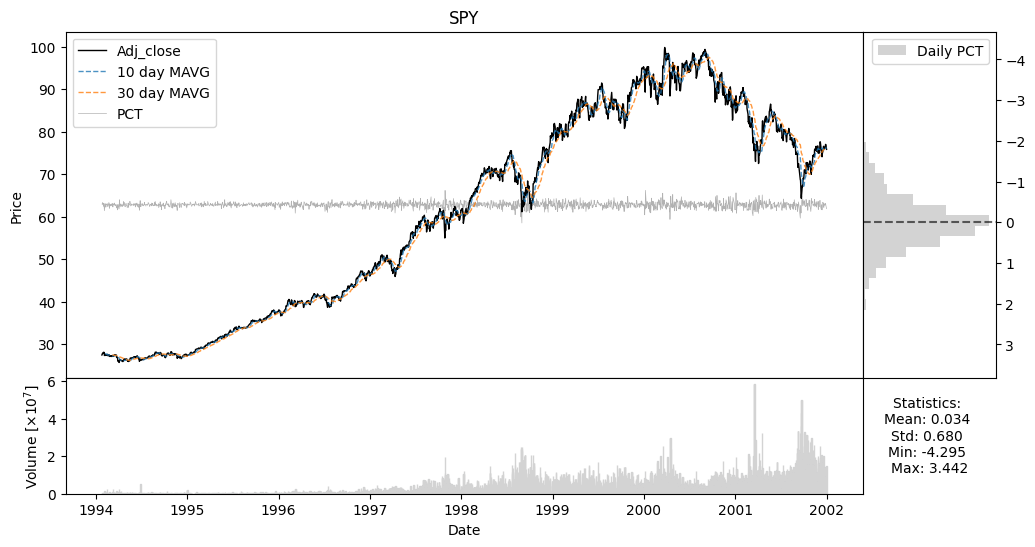

<Figure size 640x480 with 0 Axes>

In [5]:
data.quick_view()

In [6]:
from tabulate import tabulate
dh = data.historical['SPY']
# dh.index = dh.index.strftime('%Y-%m-%d')
# Display the DataFrame using tabulate
print(tabulate(dh[-11:-1], headers='keys', tablefmt='fancy_grid'))

╒═════════════════════╤════════╤════════╤════════╤═════════╤═════════════╤═════════════╕
│ Date                │   Open │   High │    Low │   Close │   Adj_close │      Volume │
╞═════════════════════╪════════╪════════╪════════╪═════════╪═════════════╪═════════════╡
│ 2001-12-14 00:00:00 │ 112.33 │ 113.49 │ 112    │  113.13 │     74.7846 │ 1.67219e+07 │
├─────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┤
│ 2001-12-17 00:00:00 │ 112.99 │ 114.36 │ 112.9  │  114.3  │     75.558  │ 1.39259e+07 │
├─────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┤
│ 2001-12-18 00:00:00 │ 114.63 │ 115.15 │ 114.34 │  114.98 │     76.0075 │ 1.36637e+07 │
├─────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┤
│ 2001-12-19 00:00:00 │ 114.09 │ 115.92 │ 114    │  115.79 │     76.543  │ 2.01434e+07 │
├─────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┤
│ 2001-12-20 00:00:00

In [29]:
# Number of columns
df = FEATURES.copy()

In [25]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'dayofweek',
       'month', 'quarter', 'year', 'dayofyear', 'SMA_10', 'SMA_30', 'EMA_10',
       'EMA_30', 'RSI', 'MACD_signal_line', 'MACD_histogram',
       'historical_volatility', 'Adj_close_ratio_day', 'Volume_ratio_day',
       'Adj_close_ratio_week', 'Volume_ratio_week', 'Adj_close_ratio_month',
       'Volume_ratio_month', 'Adj_close_ratio_quarter', 'Volume_ratio_quarter',
       'Adj_close_ratio_year', 'Volume_ratio_year', 'Adj_close_first_diff',
       'Volume_first_diff', 'Adj_close_second_diff', 'Volume_second_diff',
       'pct_daily', 'pct_lag_week', 'pct_lag_quarter', 'pct_lag_year',
       'Adj_lag_week', 'Adj_lag_quarter', 'Adj_lag_year', 'Vol_lag_week',
       'Vol_lag_quarter', 'Vol_lag_year'],
      dtype='object')


# Test PCA for dimensional reduction

In [30]:
df_r = data.pca_reduction(df, k=10)

In [31]:
df_r

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
Date,,,,,,,,,,
1995-01-23,1.872218,0.753553,-0.490095,0.332765,0.180670,-0.136634,-0.063570,-0.106284,-0.098615,-0.059108
1995-01-24,1.866024,0.755521,-0.239984,0.317153,0.180499,-0.149157,-0.047048,-0.117178,-0.090635,-0.016641
1995-01-25,1.864861,0.756803,0.008538,0.290853,0.199258,-0.135241,-0.059304,-0.130971,-0.063230,0.004745
1995-01-26,1.861863,0.757920,0.257382,0.266089,0.216024,-0.149029,-0.045842,-0.140721,-0.055439,0.029234
1995-01-27,1.853947,0.758250,0.509350,0.270784,0.186621,-0.104743,-0.080648,-0.149553,-0.050994,0.153577
...,...,...,...,...,...,...,...,...,...,...
2001-12-21,-0.721457,-0.795978,0.517698,0.161277,0.173949,-0.214618,-0.340608,0.269395,0.320816,0.001641
2001-12-24,-0.719142,-0.807172,-0.486028,0.198263,0.182476,-0.327104,-0.166994,0.171789,0.204519,-0.155321
2001-12-26,-0.729769,-0.804143,0.011747,0.138236,0.269590,-0.287268,-0.249382,0.207281,0.098035,-0.164836


In [32]:
from sklearn.decomposition import PCA

# pre-scaled dataframe df
pca = PCA(n_components=10)
df_reduced = pca.fit_transform(df)

In [30]:
df_reduced.shape

(7526, 15)

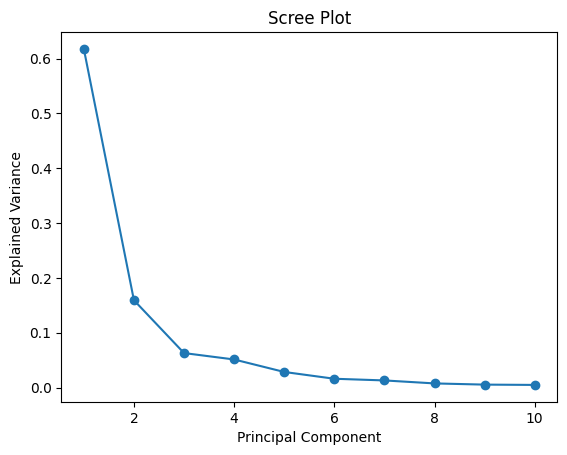

In [33]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [34]:
# Get the explained variance ratios for each component
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()

# Print the explained variance ratios and cumulative explained variance
for i, ratio in enumerate(explained_variance_ratios):
    print(f"Explained Variance for Component {i+1}: {ratio:.4f}")

for i, cumulative_ratio in enumerate(cumulative_explained_variance):
    print(f"Cumulative Explained Variance up to Component {i+1}: {cumulative_ratio:.4f}")

Explained Variance for Component 1: 0.6176
Explained Variance for Component 2: 0.1593
Explained Variance for Component 3: 0.0629
Explained Variance for Component 4: 0.0512
Explained Variance for Component 5: 0.0285
Explained Variance for Component 6: 0.0161
Explained Variance for Component 7: 0.0130
Explained Variance for Component 8: 0.0076
Explained Variance for Component 9: 0.0054
Explained Variance for Component 10: 0.0048
Cumulative Explained Variance up to Component 1: 0.6176
Cumulative Explained Variance up to Component 2: 0.7769
Cumulative Explained Variance up to Component 3: 0.8398
Cumulative Explained Variance up to Component 4: 0.8910
Cumulative Explained Variance up to Component 5: 0.9195
Cumulative Explained Variance up to Component 6: 0.9356
Cumulative Explained Variance up to Component 7: 0.9486
Cumulative Explained Variance up to Component 8: 0.9562
Cumulative Explained Variance up to Component 9: 0.9616
Cumulative Explained Variance up to Component 10: 0.9664


Text(0.5, 1.0, 'SPY PCA Feature Correlations')

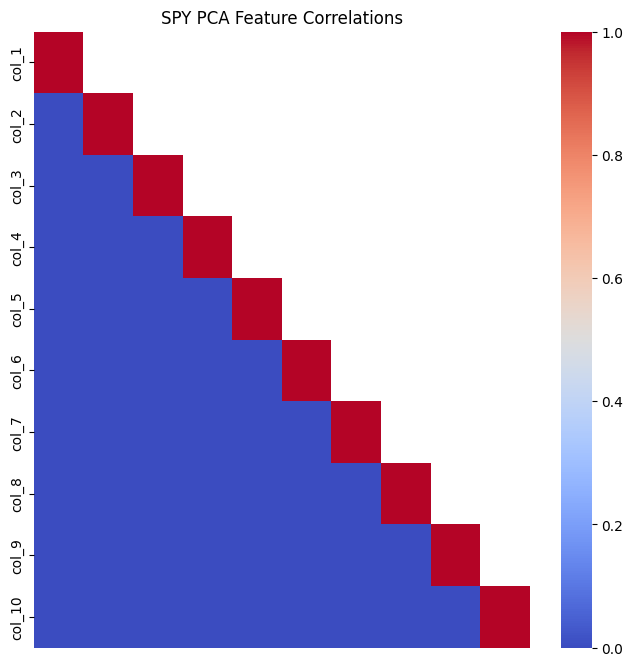

In [35]:
# correlation matrix
corr = df_r.corr()
# sns.set_style("darkgrid")
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(corr), k=1)
sns.heatmap(corr, cmap='coolwarm', mask=mask, fmt=".2f",  xticklabels=False)
plt.title("SPY PCA Feature Correlations")

In [37]:
sns.pairplot(df_r, diag_kind='kde', kind='scatter', corner=True, grid_kws={"despine": False}, plot_kws={"alpha": 0.5})
plt.tight_layout()
# plt.savefig(path+'MSFT_original_features_pairplot.pdf')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

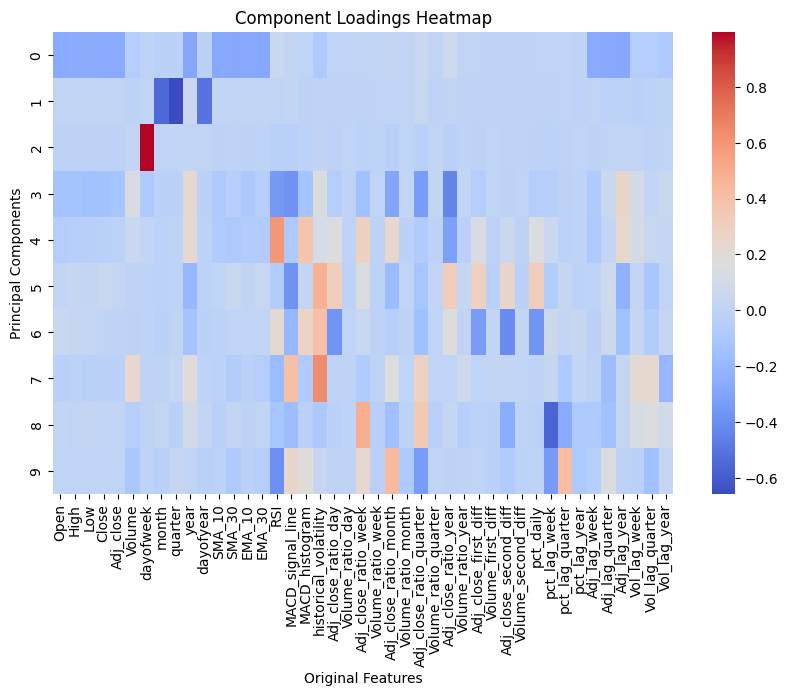

In [36]:
component_loadings = pca.components_

# Create a heatmap of the component loadings
plt.figure(figsize=(10, 6))
sns.heatmap(component_loadings, cmap='coolwarm', annot=False, fmt='.2f', xticklabels=df.columns)
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Component Loadings Heatmap')
plt.show()

In [18]:
df_reduced

array([[ 1.00127817,  0.09162742, -0.50873467, ..., -0.01359266,
        -0.00396933,  0.02203501],
       [ 0.86832038,  0.03064576, -0.22211811, ..., -0.07392493,
         0.01297146,  0.04322163],
       [ 0.89042181,  0.04426017, -0.47950066, ...,  0.03978387,
        -0.02579452,  0.01528976],
       ...,
       [ 0.32330197, -0.92142752, -0.47554139, ...,  0.00550093,
         0.01138685, -0.01730049],
       [ 0.32107223, -0.91392224,  0.52066917, ...,  0.01308266,
        -0.0021352 , -0.01280475],
       [ 0.3199904 , -0.91456949,  0.2709299 , ...,  0.01508176,
         0.00872908, -0.01653829]])

## All Data

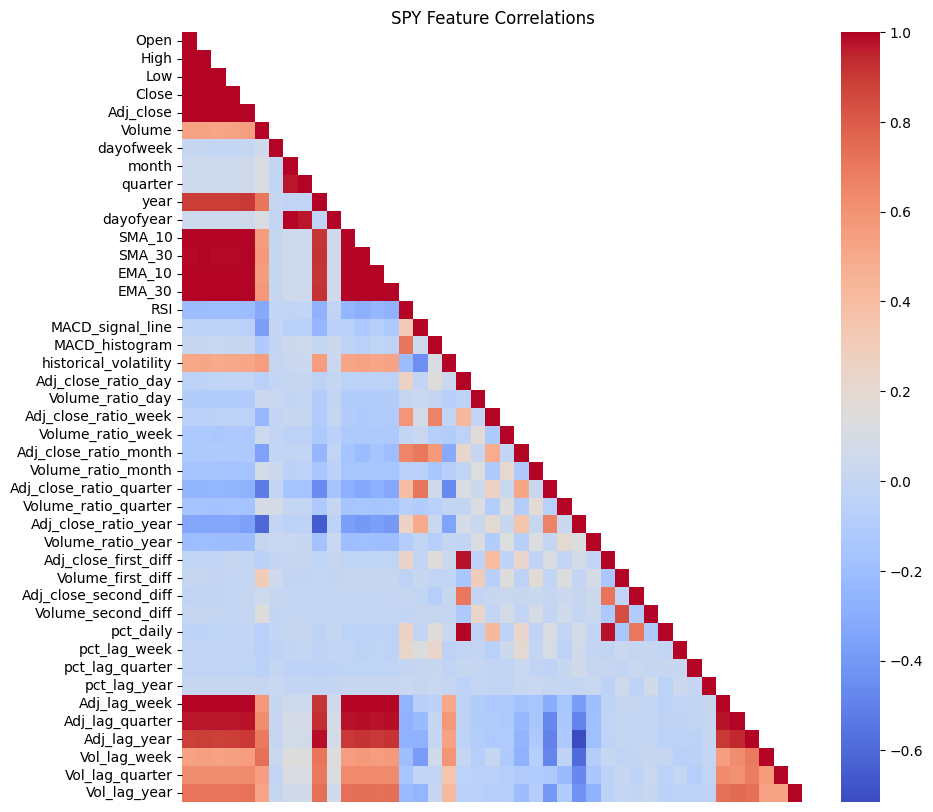

In [22]:
corr = df.corr()
# sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(corr), k=1)
sns.heatmap(corr, cmap='coolwarm', mask=mask, fmt=".2f",  xticklabels=False)
plt.title("SPY Feature Correlations")
plt.savefig(path+"plots/project/"+"all_data_corr.pdf")

In [ ]:
import datetime
start = datetime.datetime(2021,1,1)
end = datetime.datetime.now()

ticker = "MSFT"
d = Data(tickers=[ticker], start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


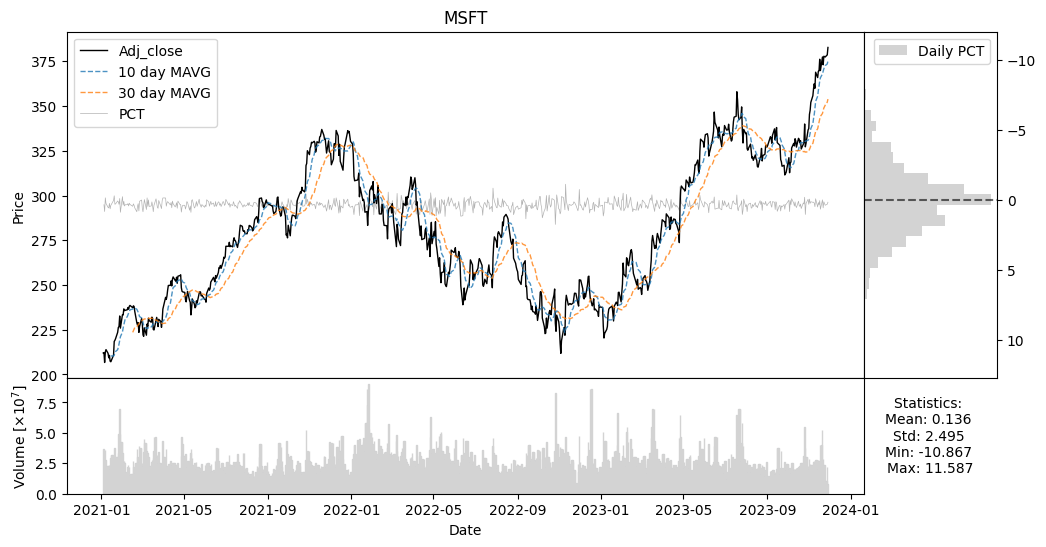

<Figure size 640x480 with 0 Axes>

In [ ]:
d.quick_view()

## Original features

In [9]:
df = FEATURES.copy()

In [11]:
# take a look at 8 key features

# features to remove
original_data = df.copy().drop([ 'Adj_close_ratio_week','pct_daily',
         'Adj_close_ratio_month','Volume_ratio_month',
       'dayofweek', 'month', 'quarter', 'year', 'dayofyear',
        'historical_volatility','SMA_10','Adj_close_ratio_quarter',
        'Volume_ratio_quarter','Adj_close_ratio_year', 'Volume_ratio_year',
       'SMA_30', 'EMA_10', 'EMA_30','MACD_signal_line', 'MACD_histogram', 'Adj_close_ratio_day',
       'Volume_ratio_day', 'Volume_ratio_week', 'RSI', 'Adj_close_first_diff',
       'Volume_first_diff', 'Adj_close_second_diff', 'Volume_second_diff',
       'pct_lag_week', 'pct_lag_quarter', 'pct_lag_year', 'Adj_lag_week',
       'Adj_lag_quarter', 'Adj_lag_year', 'Vol_lag_week', 'Vol_lag_quarter',
       'Vol_lag_year'], axis=1)

print(original_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume'], dtype='object')


In [ ]:
sub = original_data[-500:]

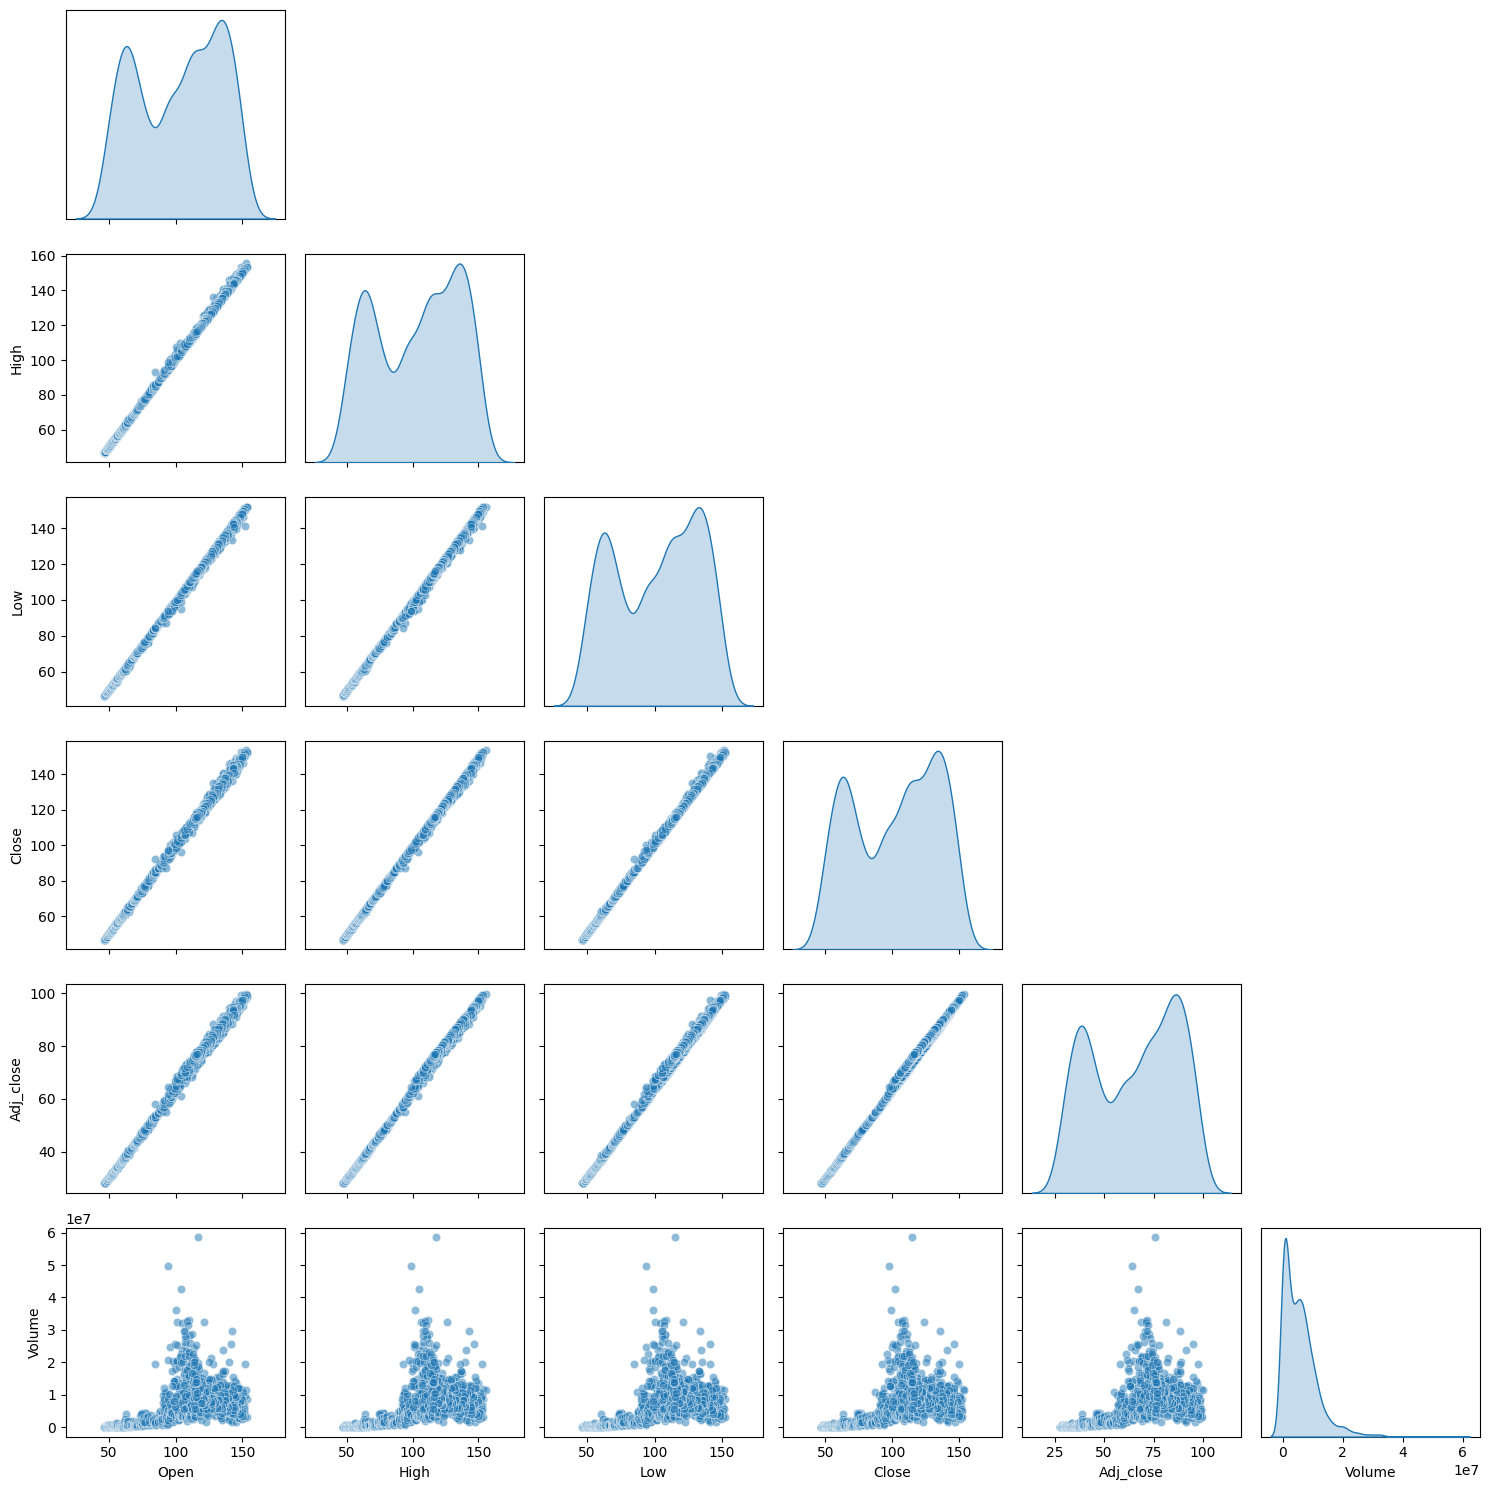

In [15]:
sns.pairplot(original_data, diag_kind='kde', kind='scatter', corner=True, grid_kws={"despine": False}, plot_kws={"alpha": 0.5})
plt.tight_layout()
# plt.savefig(path+'MSFT_original_features_pairplot.pdf')
plt.show()

In [16]:
corr = original_data.corr()

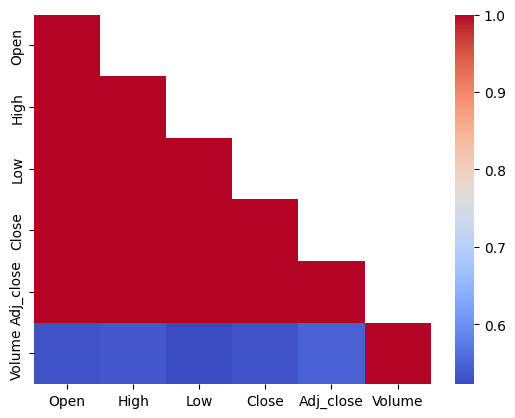

In [20]:
mask = np.triu(np.ones_like(corr), k=1)
sns.heatmap(corr, cmap='coolwarm', mask=mask, annot=False)
plt.savefig(path+"plots/project/"+"original_data_corr.pdf")

## Ratio features

In [ ]:
# take a look at 8 key features

# features to remove
adj_ratio_data = df.copy().drop(['Volume_ratio_month','Open', 'High', 'Low', 'Close',
       'dayofweek', 'month', 'quarter','year', 'dayofyear','Volume_ratio_quarter',
        'historical_volatility','SMA_10', 'Volume_ratio_year',
       'SMA_30', 'EMA_10', 'EMA_30','MACD_signal_line', 'MACD_histogram',
       'Volume_ratio_day', 'Volume_ratio_week', 'RSI','Volume',
         'Adj_close_first_diff',
       'Volume_first_diff', 'Adj_close_second_diff', 'Volume_second_diff',
       'pct_lag_week', 'pct_lag_quarter', 'pct_lag_year', 'Adj_lag_week',
       'Adj_lag_quarter', 'Adj_lag_year', 'Vol_lag_week', 'Vol_lag_quarter',
       'Vol_lag_year'], axis=1)

# features to remove
volume_ratio_data = df.copy().drop(['Adj_close_ratio_week', 'Open', 'High', 'Low', 'Close',
         'Adj_close_ratio_month','Adj_close_ratio_day','Adj_close_ratio_year',
       'dayofweek', 'month', 'quarter', 'year', 'dayofyear', 'Adj_close',
        'historical_volatility','SMA_10','Adj_close_ratio_quarter',
       'SMA_30', 'EMA_10', 'EMA_30','MACD_signal_line', 'MACD_histogram',
      'RSI', 'Adj_close_first_diff',
       'Volume_first_diff', 'Adj_close_second_diff', 'Volume_second_diff',
       'pct_lag_week', 'pct_lag_quarter', 'pct_lag_year', 'Adj_lag_week',
       'Adj_lag_quarter', 'Adj_lag_year', 'Vol_lag_week', 'Vol_lag_quarter',
       'Vol_lag_year'], axis=1)

print(adj_ratio_data.columns)
print(volume_ratio_data.columns)

Index(['Adj_close', 'Adj_close_ratio_day', 'Adj_close_ratio_week',
       'Adj_close_ratio_month', 'Adj_close_ratio_quarter',
       'Adj_close_ratio_year'],
      dtype='object')
Index(['Volume', 'Volume_ratio_day', 'Volume_ratio_week', 'Volume_ratio_month',
       'Volume_ratio_quarter', 'Volume_ratio_year'],
      dtype='object')


In [ ]:
adj_sub = adj_ratio_data[-500:]

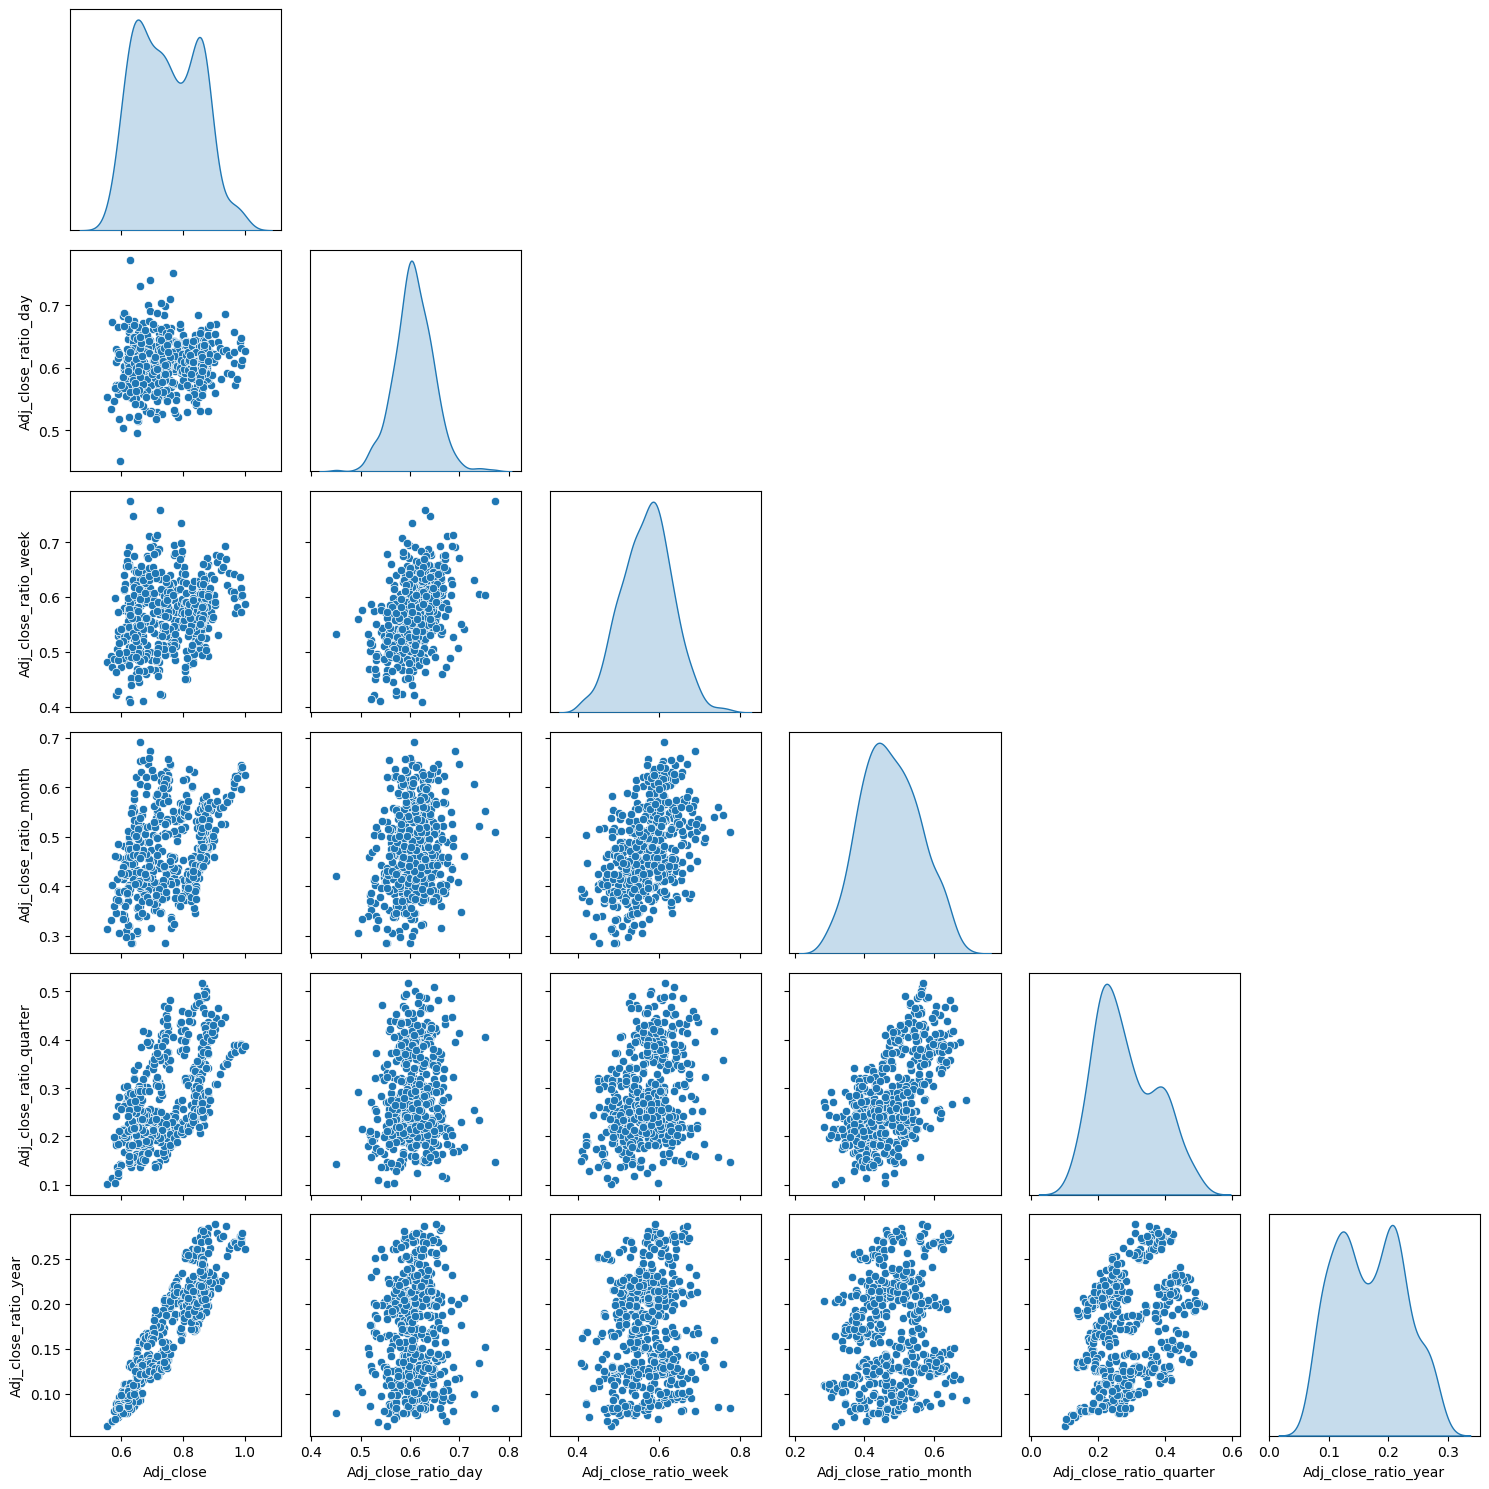

In [ ]:
sns.pairplot(adj_sub, diag_kind='kde', kind='scatter', markers='o', corner=True, grid_kws={"despine": False})
plt.tight_layout()
# plt.savefig(path+'MSFT_adj_features_pairplot.pdf')
plt.show()

<Axes: >

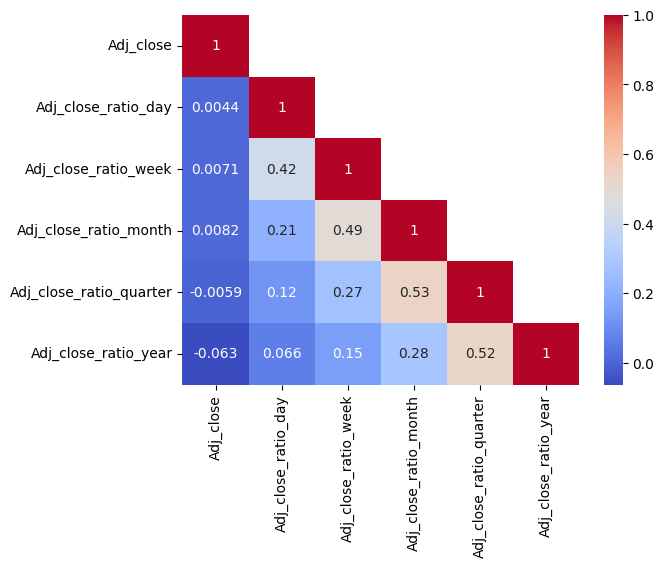

In [ ]:
corr = adj_ratio_data.corr()
# sns.set_style("darkgrid")
mask = np.triu(np.ones_like(corr), k=1)
sns.heatmap(corr, cmap='coolwarm', mask=mask, annot=True)

In [ ]:
corr

,Adj_close,Adj_close_ratio_day,Adj_close_ratio_week,Adj_close_ratio_month,Adj_close_ratio_quarter,Adj_close_ratio_year
Adj_close,1.000000,0.095323,0.197975,0.349994,0.554913,0.911120
Adj_close_ratio_day,0.095323,1.000000,0.421362,0.213010,0.110997,0.053887
Adj_close_ratio_week,0.197975,0.421362,1.000000,0.453677,0.257761,0.097707
Adj_close_ratio_month,0.349994,0.213010,0.453677,1.000000,0.589500,0.142474
Adj_close_ratio_quarter,0.554913,0.110997,0.257761,0.589500,1.000000,0.340360
Adj_close_ratio_year,0.911120,0.053887,0.097707,0.142474,0.340360,1.000000


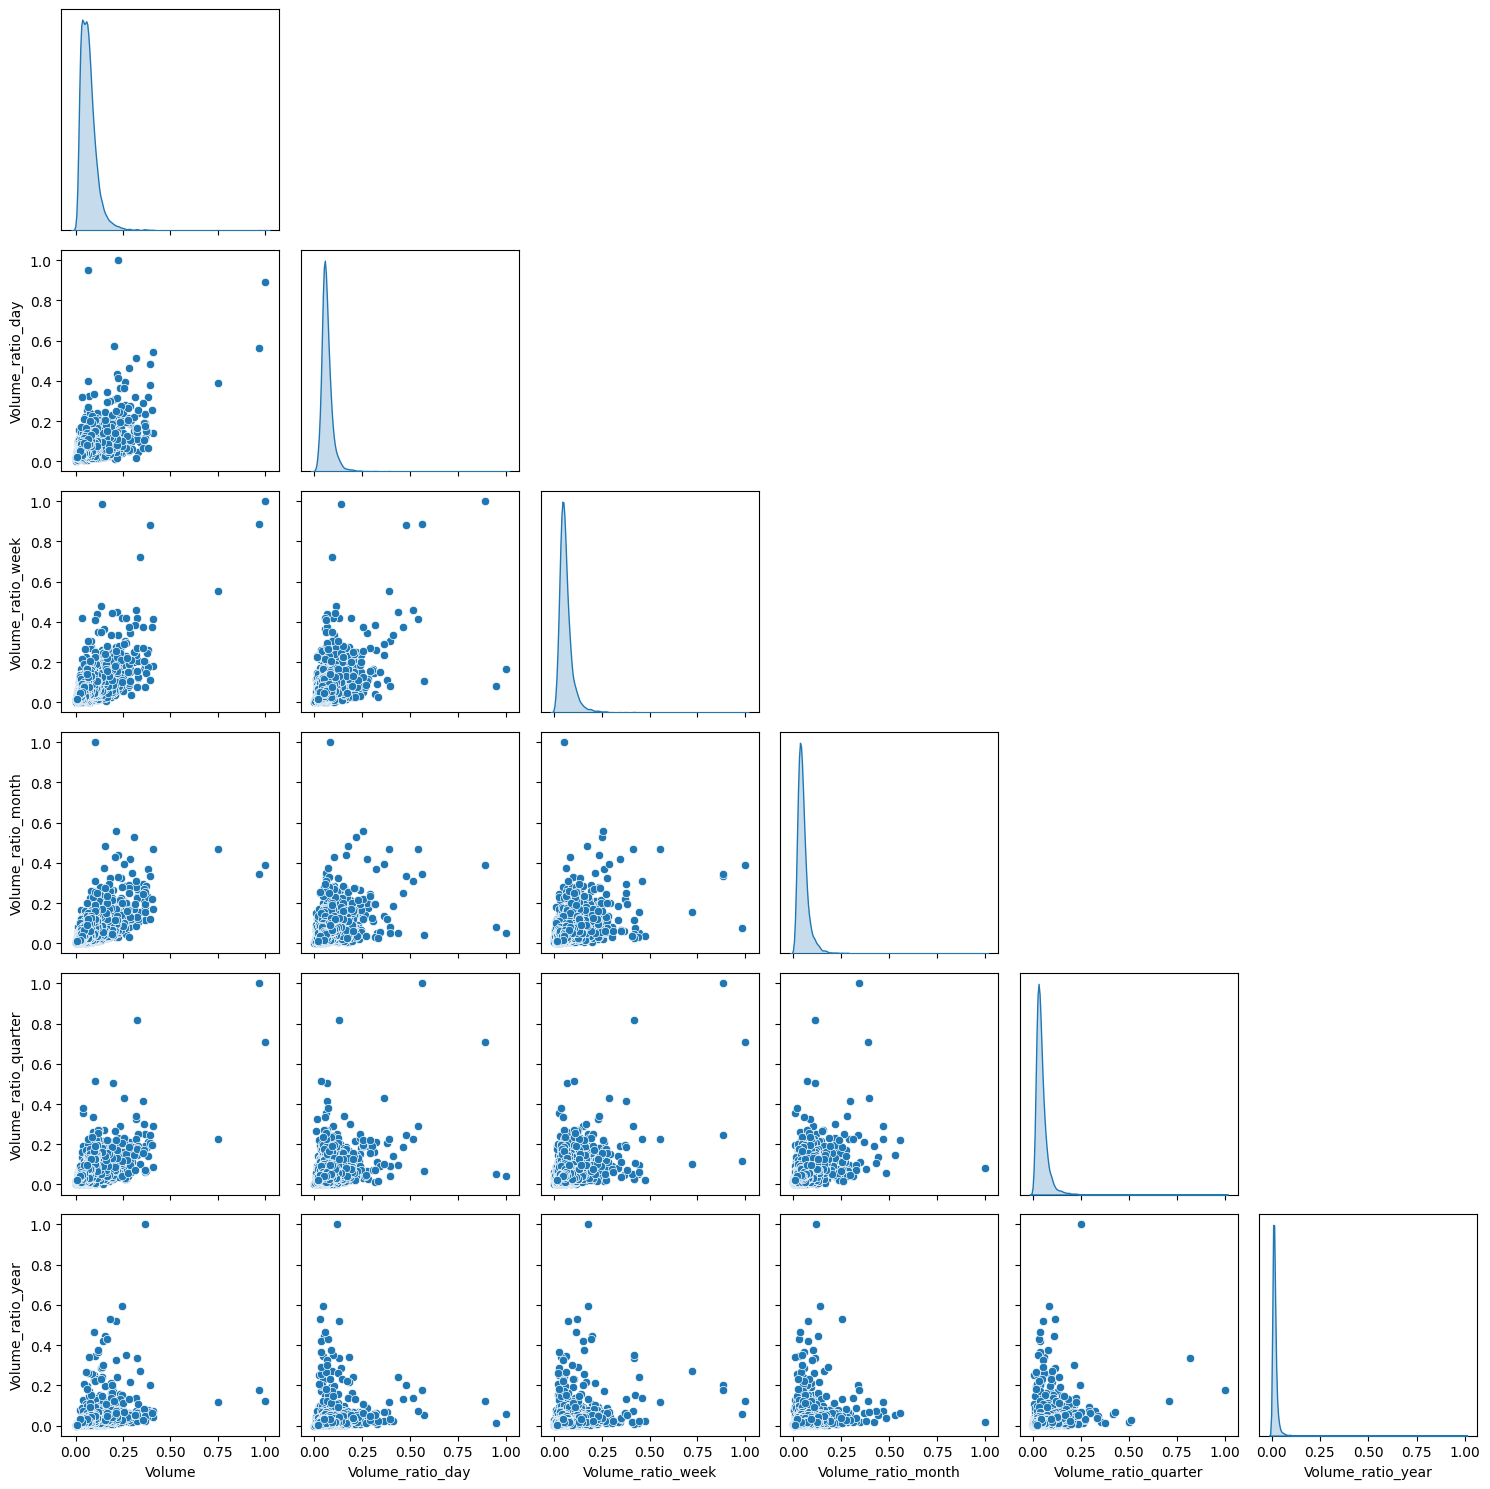

In [ ]:
sns.pairplot(volume_ratio_data, diag_kind='kde', kind='scatter', markers='o', corner=True, grid_kws={"despine": False})
plt.tight_layout()
plt.savefig(path+'MSFT_volume_features_pairplot.pdf')
plt.show()

## Indicator Features

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'dayofweek',
       'month', 'quarter', 'year', 'dayofyear', 'SMA_10', 'SMA_30', 'EMA_10',
       'EMA_30', 'RSI', 'MACD_signal_line', 'MACD_histogram',
       'historical_volatility', 'Adj_close_ratio_day', 'Volume_ratio_day',
       'Adj_close_ratio_week', 'Volume_ratio_week', 'Adj_close_ratio_month',
       'Volume_ratio_month', 'Adj_close_ratio_quarter', 'Volume_ratio_quarter',
       'Adj_close_ratio_year', 'Volume_ratio_year', 'lag_week', 'lag_quarter',
       'lag_year'],
      dtype='object')

In [ ]:
# features to remove
indicators_data = df.copy().drop(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'dayofweek',
       'month', 'quarter', 'year', 'dayofyear',
       'historical_volatility', 'Adj_close_ratio_day', 'Volume_ratio_day',
       'Adj_close_ratio_week', 'Volume_ratio_week', 'Adj_close_ratio_month',
       'Volume_ratio_month', 'Adj_close_ratio_quarter', 'Volume_ratio_quarter',
       'Adj_close_ratio_year', 'Volume_ratio_year', 'lag_week', 'lag_quarter',
       'lag_year'], axis=1)

print(indicators_data.columns)

Index(['SMA_10', 'SMA_30', 'EMA_10', 'EMA_30', 'RSI', 'MACD_signal_line',
       'MACD_histogram'],
      dtype='object')


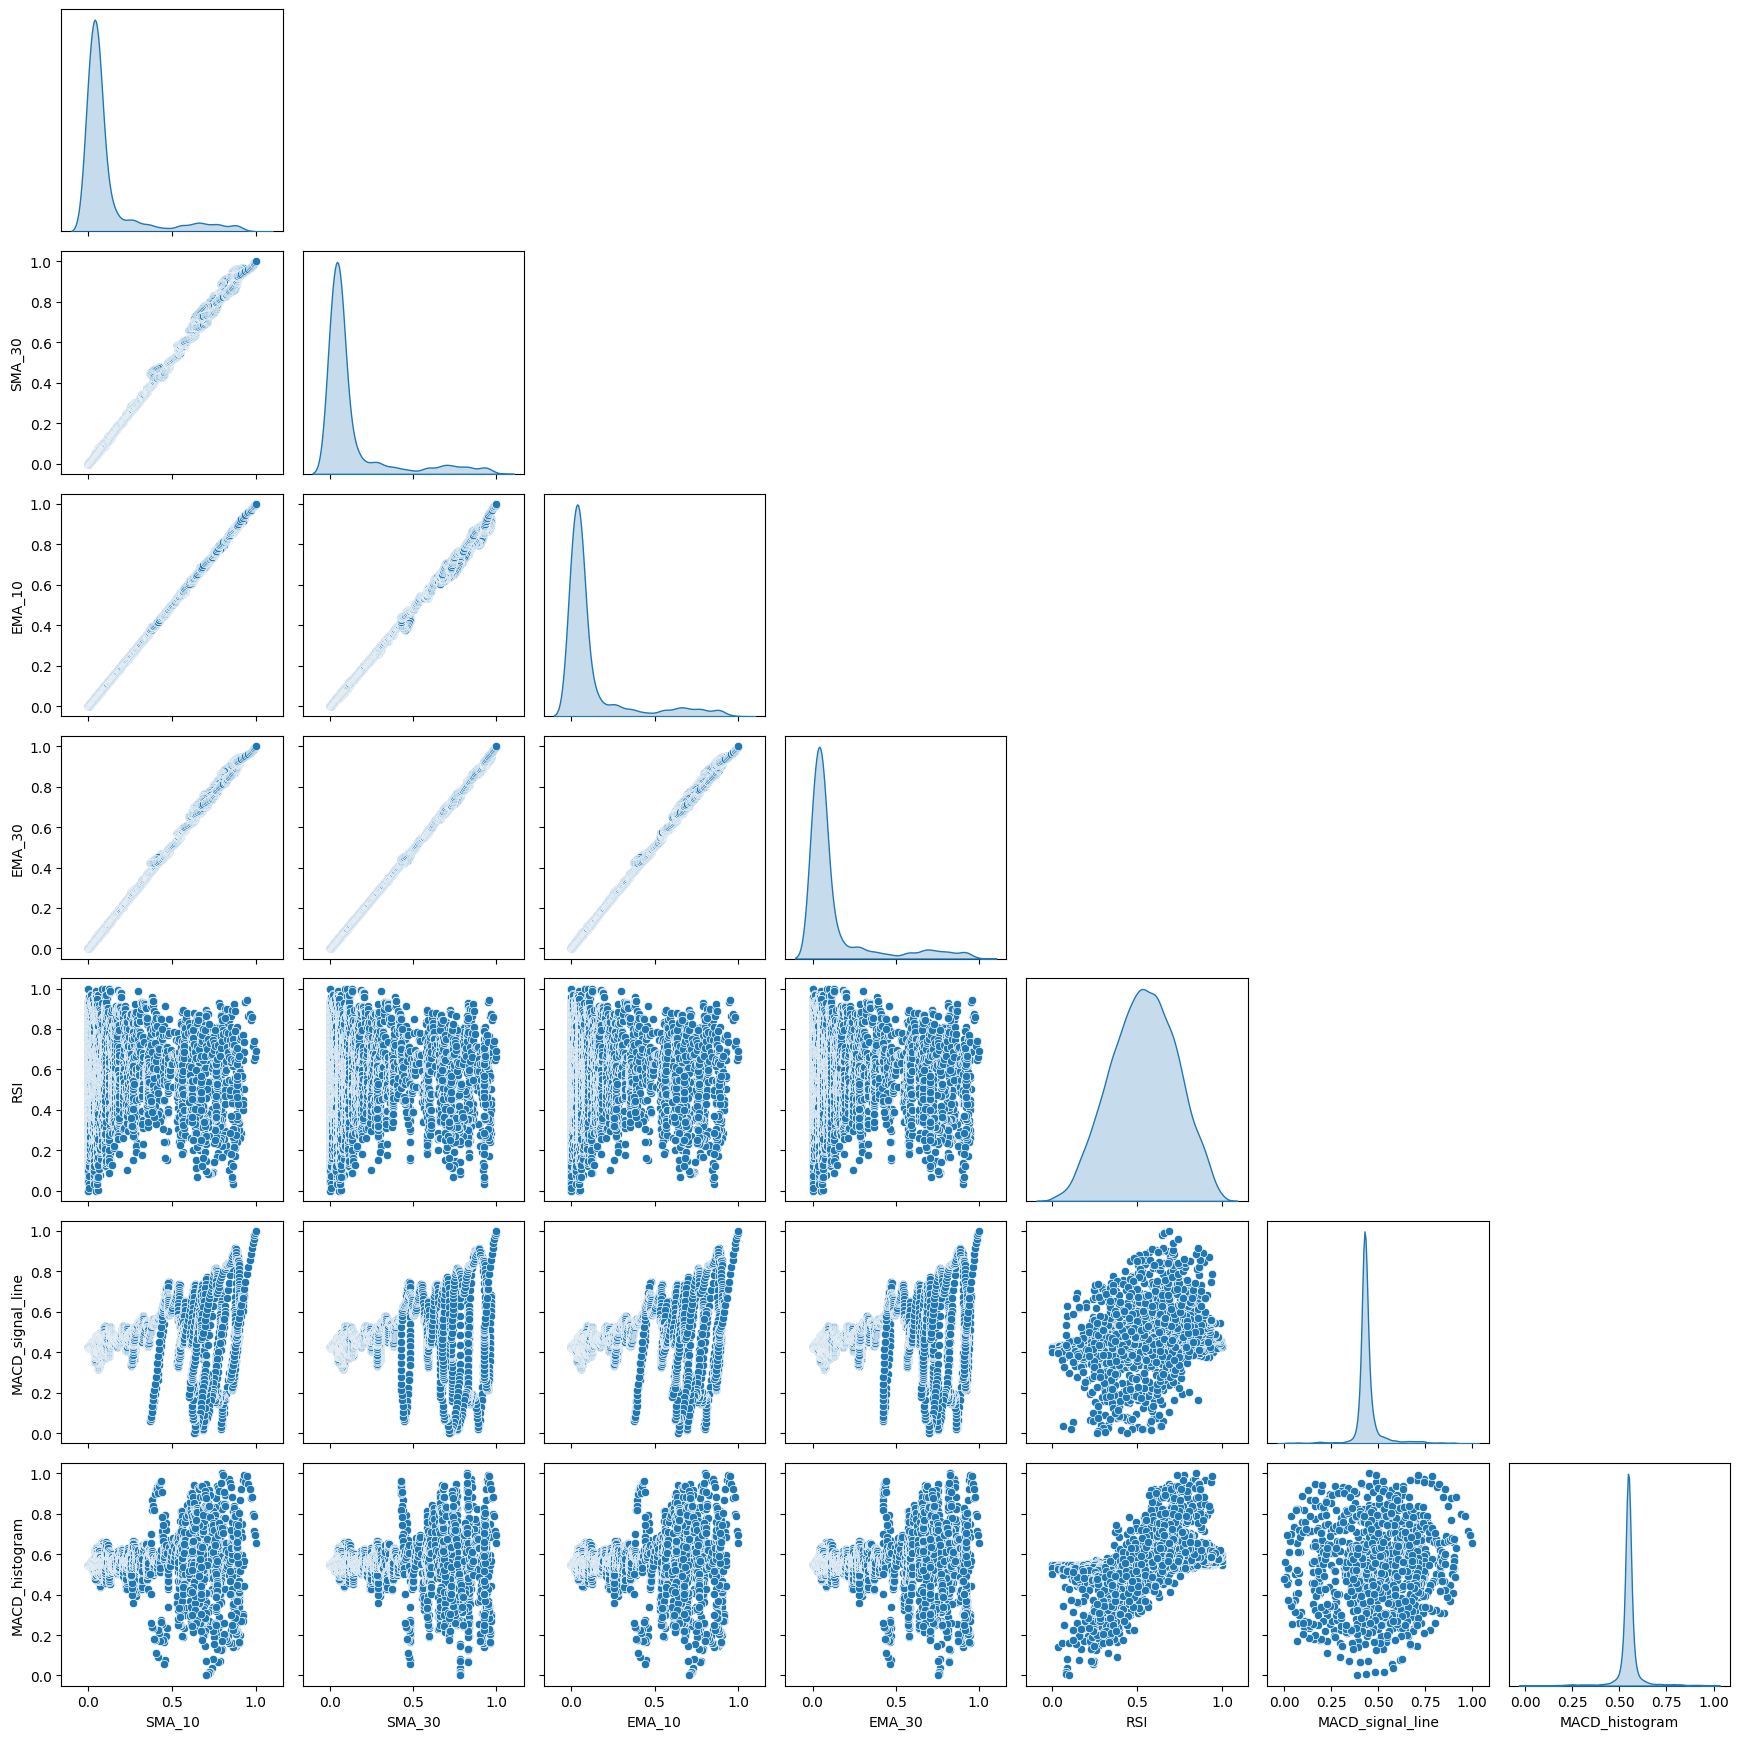

In [ ]:
sns.pairplot(indicators_data, diag_kind='kde', kind='scatter', markers='o', corner=True, grid_kws={"despine": False})
plt.tight_layout()
plt.savefig(path+'MSFT_indicator_features_pairplot.pdf')
plt.show()

## Lag features

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'dayofweek',
       'month', 'quarter', 'year', 'dayofyear', 'SMA_10', 'SMA_30', 'EMA_10',
       'EMA_30', 'RSI', 'MACD_signal_line', 'MACD_histogram',
       'historical_volatility', 'Adj_close_ratio_day', 'Volume_ratio_day',
       'Adj_close_ratio_week', 'Volume_ratio_week', 'Adj_close_ratio_month',
       'Volume_ratio_month', 'Adj_close_ratio_quarter', 'Volume_ratio_quarter',
       'Adj_close_ratio_year', 'Volume_ratio_year', 'lag_week', 'lag_quarter',
       'lag_year'],
      dtype='object')

In [ ]:
# features to remove
lag_data = df.copy().drop(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'dayofweek',
       'month', 'quarter', 'year', 'dayofyear', 'SMA_10', 'SMA_30', 'EMA_10',
       'EMA_30', 'RSI', 'MACD_signal_line', 'MACD_histogram',
       'historical_volatility', 'Adj_close_ratio_day', 'Volume_ratio_day',
       'Adj_close_ratio_week', 'Volume_ratio_week', 'Adj_close_ratio_month',
       'Volume_ratio_month', 'Adj_close_ratio_quarter', 'Volume_ratio_quarter',
       'Adj_close_ratio_year', 'Volume_ratio_year'], axis=1)

print(lag_data.columns)

Index(['lag_week', 'lag_quarter', 'lag_year'], dtype='object')


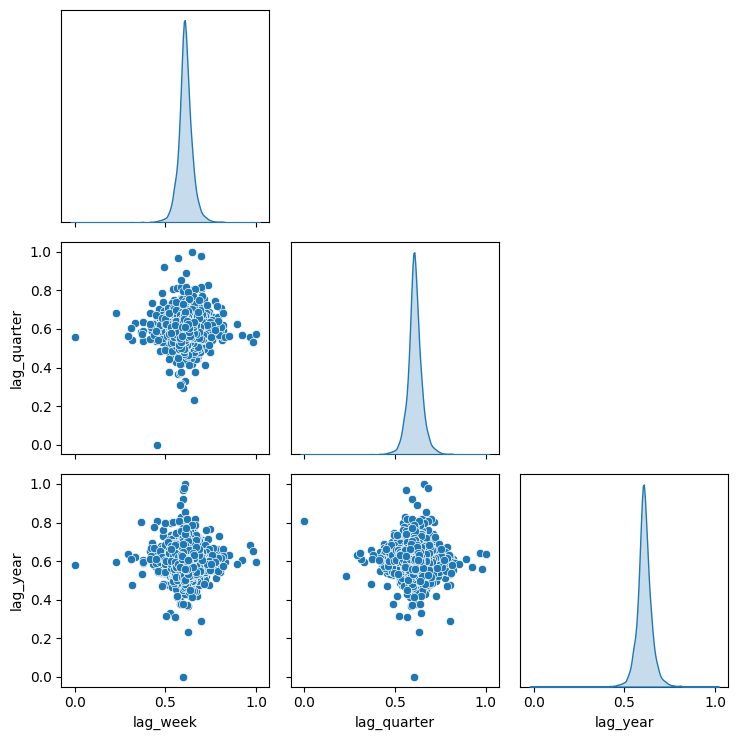

In [ ]:
sns.pairplot(lag_data, diag_kind='kde', kind='scatter', markers='o', corner=True, grid_kws={"despine": False})
plt.tight_layout()
plt.savefig(path+'MSFT_lag_features_pairplot.pdf')
plt.show()

## Time Features

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'dayofweek',
       'month', 'quarter', 'year', 'dayofyear', 'SMA_10', 'SMA_30', 'EMA_10',
       'EMA_30', 'RSI', 'MACD_signal_line', 'MACD_histogram',
       'historical_volatility', 'Adj_close_ratio_day', 'Volume_ratio_day',
       'Adj_close_ratio_week', 'Volume_ratio_week', 'Adj_close_ratio_month',
       'Volume_ratio_month', 'Adj_close_ratio_quarter', 'Volume_ratio_quarter',
       'Adj_close_ratio_year', 'Volume_ratio_year', 'lag_week', 'lag_quarter',
       'lag_year'],
      dtype='object')

In [ ]:
# features to remove
time_data = df.copy().drop(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'SMA_10', 'SMA_30', 'EMA_10',
       'EMA_30', 'RSI', 'MACD_signal_line', 'MACD_histogram',
       'historical_volatility', 'Adj_close_ratio_day', 'Volume_ratio_day',
       'Adj_close_ratio_week', 'Volume_ratio_week', 'Adj_close_ratio_month',
       'Volume_ratio_month', 'Adj_close_ratio_quarter', 'Volume_ratio_quarter',
       'Adj_close_ratio_year', 'Volume_ratio_year', 'lag_week', 'lag_quarter',
       'lag_year'], axis=1)

print(time_data.columns)

Index(['dayofweek', 'month', 'quarter', 'year', 'dayofyear'], dtype='object')


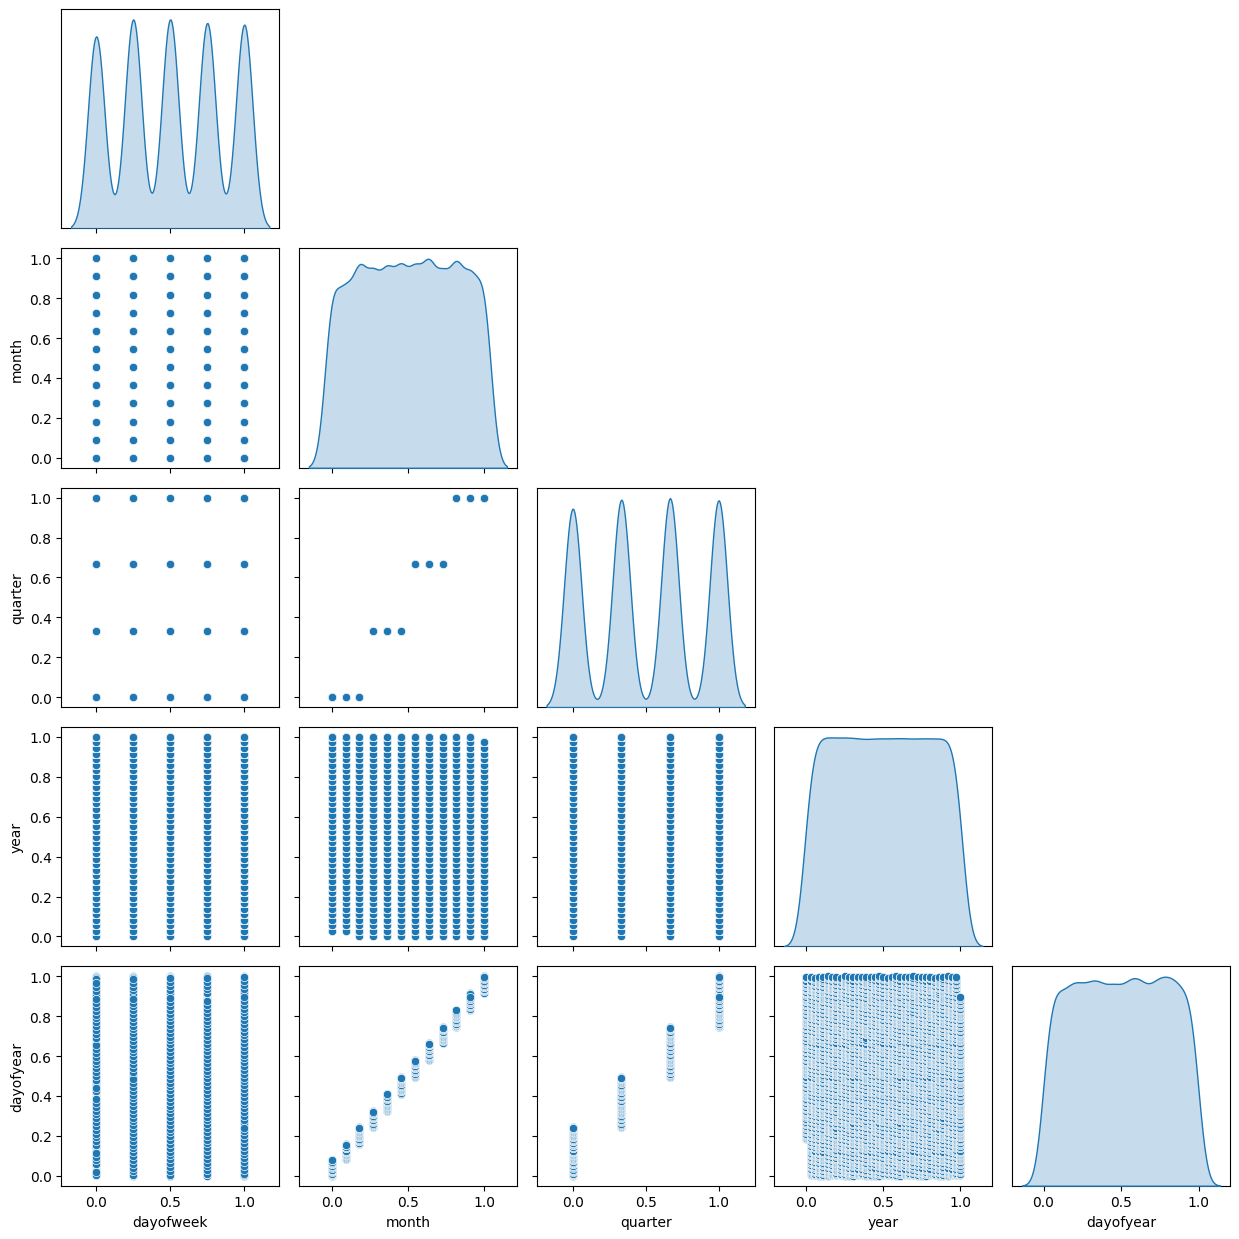

In [ ]:
sns.pairplot(time_data, diag_kind='kde', kind='scatter', markers='o', corner=True, grid_kws={"despine": False})
plt.tight_layout()
plt.savefig(path+'MSFT_time_features_pairplot.pdf')
plt.show()

# Testing Dummy Target

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_close', 'Volume', 'dayofweek',
       'month', 'quarter', 'year', 'dayofyear', 'SMA_10', 'SMA_30', 'EMA_10',
       'EMA_30', 'RSI', 'MACD_signal_line', 'MACD_histogram',
       'historical_volatility', 'Adj_close_ratio_day', 'Volume_ratio_day',
       'Adj_close_ratio_week', 'Volume_ratio_week', 'Adj_close_ratio_month',
       'Volume_ratio_month', 'Adj_close_ratio_quarter', 'Volume_ratio_quarter',
       'Adj_close_ratio_year', 'Volume_ratio_year', 'lag_week', 'lag_quarter',
       'lag_year'],
      dtype='object')

In [ ]:
# features to use: adj_close, volume, day_of_week, month, volume_ratio_day, volume_ratio_month

# closeday = df.Adj_close_ratio_day
# closeweek = df.Adj_close_ratio_week
# dayofweek = df.dayofweek
# month = df.month
# volumeday = df.Volume_ratio_day
# volumemonth = df.Volume_ratio_month


test_feature = np.sin(df.)
# noise = np.random.normal(0, 0.5, len(test_feature))
# test_feature += noise
# signal = np.sin(dayofweek)


# dummy =   df.Volume_ratio_day * df.Adj_close_ratio_day * df.Adj_close_ratio_week * np.sin(df.dayofweek) * np.cos(1/df.month) + noise

print('Min: ', test_feature.min(), ' index: ', np.argmin(test_feature))
print('Max: ', test_feature.max(), ' index: ', np.argmax(test_feature))

# test_feature = test_feature[-100:]



Min:  0.0  index:  155
Max:  0.8414709848078965  index:  165


In [ ]:
test_target = (dummy > 1).astype(int)

test_target.sum() / test_target.count()

0.4722792607802875

<ipython-input-10-82e5bf0b2115>:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_date, end_date, ymin=0.36, ymax=0.6, color='k', linestyle='-', linewidth=2, edgecolor='black', alpha=0.15, label='Last Year')
<ipython-input-10-82e5bf0b2115>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


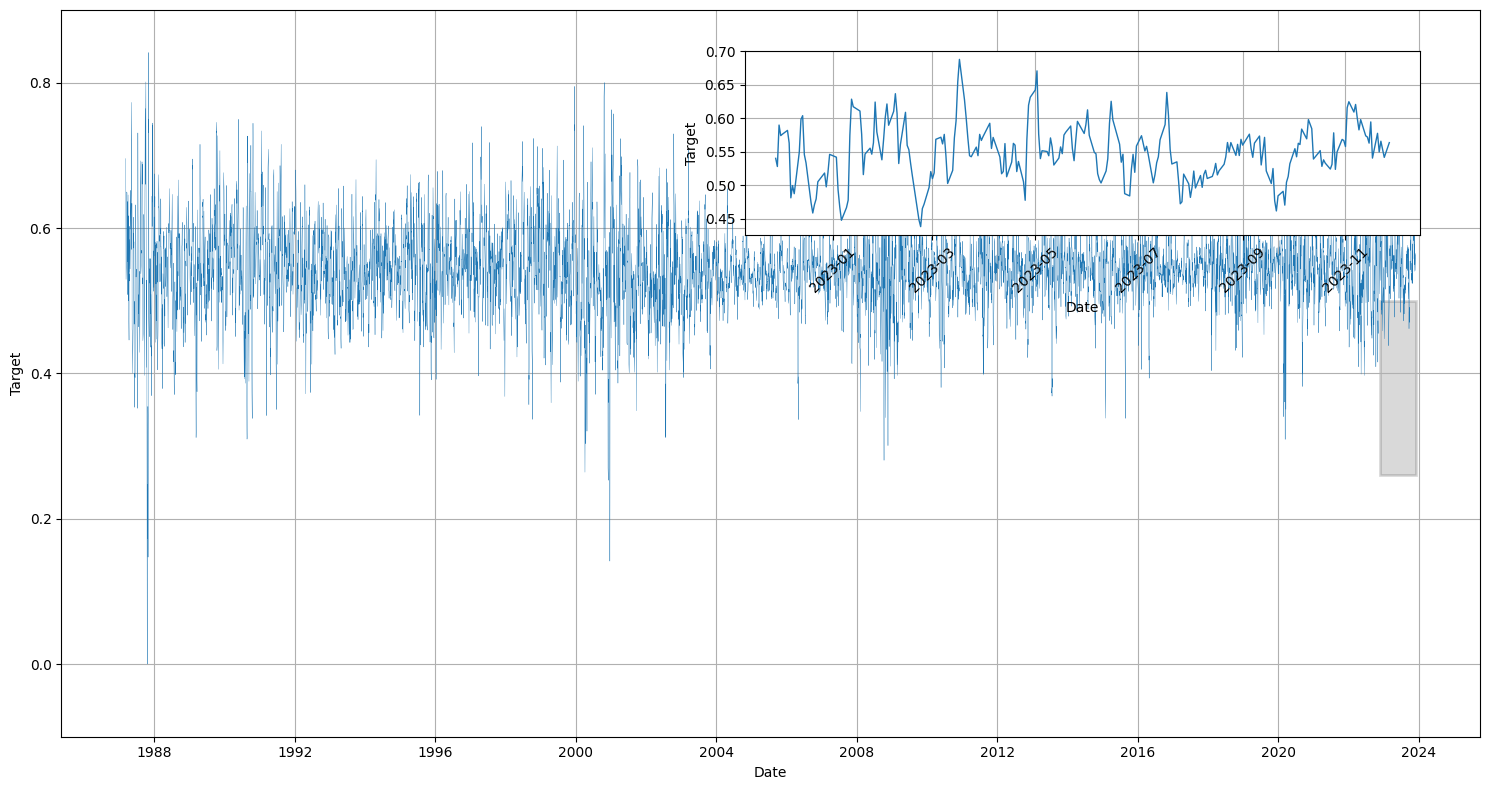

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(test_feature, color='C0', linewidth=0.25, alpha=1)
# plt.plot(signal, color='C1', linewidth=0.15, alpha=1)
plt.ylim(-0.1,0.9)
# Styling
# plt.title('Time Series Data with Inset Plot')
plt.xlabel('Date')
plt.ylabel('Target')
plt.grid()

# Calculate the start and end dates for the last year
end_date = datetime.datetime.now()
start_date = end_date - pd.DateOffset(years=1)

# Highlight the last year with a black frame (box)
plt.axvspan(start_date, end_date, ymin=0.36, ymax=0.6, color='k', linestyle='-', linewidth=2, edgecolor='black', alpha=0.15, label='Last Year')


# Inset plot
ax_inset = plt.axes([0.5, 0.7, 0.45, 0.23])  # [left, bottom, width, height]
last_year_data = test_feature.loc[test_feature.index >= datetime.datetime.now() - pd.DateOffset(years=1)]
# last_year_data_signal = signal.loc[signal.index >= datetime.datetime.now() - pd.DateOffset(years=1)]
ax_inset.plot(last_year_data, label='Last Year', color='C0', linewidth=1)
# ax_inset.plot(last_year_data_signal, label='Last Year', color='C1', linewidth=1, alpha=0.6)
# ax_inset.set_title('Last Year')

# Show grid lines in the main plot
plt.grid()

# Add axis labels to the inset plot
ax_inset.set_xlabel('Date')
ax_inset.set_ylabel('Target')
ax_inset.tick_params(axis='x', rotation=45)

plt.tight_layout()
# plt.savefig(path+"dummy_feature_example.pdf")

plt.show()

In [ ]:
df.tail()

,Open,High,Low,Close,Adj_close,Volume,dayofweek,month,quarter,year,...,Volume_ratio_week,Adj_close_ratio_month,Volume_ratio_month,Adj_close_ratio_quarter,Volume_ratio_quarter,Adj_close_ratio_year,Volume_ratio_year,lag_week,lag_quarter,lag_year
9249,0.982050,0.997576,0.986146,0.998914,0.998914,0.062115,0.00,0.909091,1.0,1.0,...,0.141095,0.638373,0.092529,0.379652,0.096785,0.270785,0.034774,0.656297,0.634524,0.630965
9250,0.993831,0.990593,0.986465,0.987340,0.987344,0.031488,0.25,0.909091,1.0,1.0,...,0.052690,0.618187,0.038596,0.388017,0.046411,0.263160,0.018755,0.589904,0.562911,0.627132
9251,1.000000,1.000000,0.996706,1.000000,1.000000,0.025019,0.50,0.909091,1.0,1.0,...,0.043976,0.595512,0.017359,0.390829,0.040635,0.267679,0.033047,0.625891,0.625119,0.605453
9252,0.998226,0.995204,0.997158,0.998888,0.998888,0.008243,1.00,0.909091,1.0,1.0,...,0.016610,0.644131,0.010617,0.388041,0.025041,0.275515,0.004914,0.607001,0.610671,0.559582
9253,0.996770,0.995758,1.000000,0.998755,0.998756,0.002212,0.00,0.909091,1.0,1.0,...,0.003399,0.636189,0.006845,0.375979,0.008821,0.277581,0.003491,0.641577,0.635472,0.594278


In [ ]:
(test_feature > 0).astype(int).sum()

5660

In [ ]:
(test_feature > 0).astype(int).sum()/len(test_feature)

0.6117596195417208

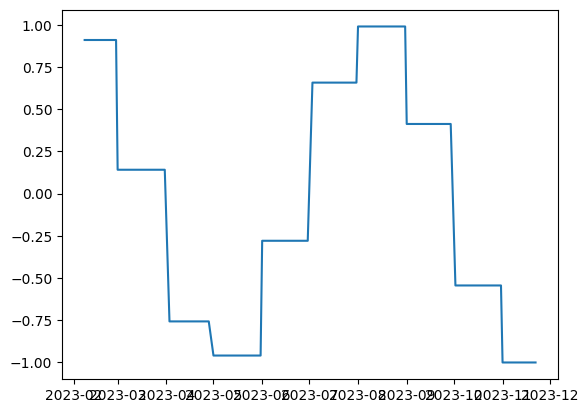

In [ ]:
plt.plot(np.sin(month[-200:]))

In [ ]:
for column in df.columns:
  print('Feature: ', column, ' Max: ', df[column].max(), ' Min: ', df[column].min())


Feature:  Open  Max:  378.0  Min:  0.2777779996395111
Feature:  High  Max:  379.7900085449219  Min:  0.28645798563957214
Feature:  Low  Max:  374.9700012207031  Min:  0.2586809992790222
Feature:  Close  Max:  377.8500061035156  Min:  0.2725690007209778
Feature:  Adj_close  Max:  377.8500061035156  Min:  0.16898295283317566
Feature:  Volume  Max:  788688000  Min:  3705600
Feature:  leakage  Max:  0.19712610874062106  Min:  -0.302157059193186
Feature:  dayofweek  Max:  4  Min:  0
Feature:  month  Max:  12  Min:  1
Feature:  quarter  Max:  4  Min:  1
Feature:  year  Max:  2023  Min:  1987
Feature:  dayofyear  Max:  366  Min:  2
Feature:  SMA_10  Max:  370.8387939453125  Min:  0.17005965113639832
Feature:  SMA_30  Max:  348.91498413085935  Min:  0.1597626785437266
Feature:  EMA_10  Max:  369.8575353396443  Min:  0.17142380898433246
Feature:  EMA_30  Max:  353.93134298626387  Min:  0.15880975380398613
Feature:  RSI  Max:  100.0  Min:  0.0
Feature:  MACD_signal_line  Max:  10.568430444593297

# Fix the Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
data.historical['SPX']

,Open,High,Low,Close,Adj_close,Volume
Date,,,,,,
2000-03-02,1.74884,2.49834,1.74884,2.49834,2.49834,2562
2000-03-03,1.87375,1.87375,1.87375,1.87375,1.87375,80
2000-03-06,2.49834,2.49834,2.49834,2.49834,2.49834,240
2000-03-07,4.37209,4.37209,4.37209,4.37209,4.37209,0
2000-03-08,4.37209,4.37209,4.37209,4.37209,4.37209,0
...,...,...,...,...,...,...
2018-01-24,0.05500,0.05500,0.05500,0.05500,0.05500,7000
2018-01-25,0.05500,0.05500,0.05500,0.05500,0.05500,1160
2018-01-26,0.05000,0.05000,0.05000,0.05000,0.05000,1800


In [26]:
FEATURES.replace([np.inf, -np.inf], 0, inplace=True)

In [27]:
# try scaling

scaler = MinMaxScaler()
scaler.fit(FEATURES)
scaled_data = scaler.transform(FEATURES)

In [21]:
# Check for infinite values
inf_mask = np.isinf(FEATURES)

# Find rows and columns with infinite values
rows_with_inf = inf_mask.any(axis=1)
cols_with_inf = inf_mask.any(axis=0)

# Get the row and column indices with infinite values
row_indices_with_inf = rows_with_inf[rows_with_inf].index
col_indices_with_inf = cols_with_inf[cols_with_inf].index

# Print the locations of rows and columns with infinite values
if not row_indices_with_inf.empty:
    print("Rows with infinite values:")
    print(FEATURES.loc[row_indices_with_inf])

if not col_indices_with_inf.empty:
    print("Columns with infinite values:")
    print(FEATURES.columns[col_indices_with_inf])


Rows with infinite values:
               Open     High      Low    Close  Adj_close  Volume  dayofweek  \
Date                                                                           
2001-03-02  1.87375  1.87375  1.87375  1.87375    1.87375     560          4   
2001-03-22  1.24917  1.24917  1.24917  1.24917    1.24917     200          3   
2001-03-23  1.37409  1.37409  1.37409  1.37409    1.37409      40          4   
2001-04-17  1.24917  1.24917  1.24917  1.24917    1.24917      68          1   
2001-04-19  1.24917  1.24917  1.24917  1.24917    1.24917     200          3   
...             ...      ...      ...      ...        ...     ...        ...   
2018-01-17  0.05000  0.05500  0.05000  0.05500    0.05500   52000          2   
2018-01-22  0.05500  0.06000  0.05500  0.06000    0.06000   63000          0   
2018-01-24  0.05500  0.05500  0.05500  0.05500    0.05500    7000          2   
2018-01-25  0.05500  0.05500  0.05500  0.05500    0.05500    1160          3   
2018-01-26  0

IndexError: ignored

In [25]:
df = FEATURES.query("Date=='2001-03-02'")

for col in df.columns:
  print('Column: ', col, ' Value: ', df[col].values)

Column:  Open  Value:  [1.87374997]
Column:  High  Value:  [1.87374997]
Column:  Low  Value:  [1.87374997]
Column:  Close  Value:  [1.87374997]
Column:  Adj_close  Value:  [1.87374997]
Column:  Volume  Value:  [560]
Column:  dayofweek  Value:  [4]
Column:  month  Value:  [3]
Column:  quarter  Value:  [1]
Column:  year  Value:  [2001]
Column:  dayofyear  Value:  [61]
Column:  SMA_10  Value:  [1.76133097]
Column:  SMA_30  Value:  [1.51149529]
Column:  EMA_10  Value:  [1.74173426]
Column:  EMA_30  Value:  [1.60846095]
Column:  RSI  Value:  [100.]
Column:  MACD_signal_line  Value:  [0.08153284]
Column:  MACD_histogram  Value:  [0.0177713]
Column:  historical_volatility  Value:  [0.25809668]
Column:  Adj_close_ratio_day  Value:  [1.07142449]
Column:  Volume_ratio_day  Value:  [inf]
Column:  Adj_close_ratio_week  Value:  [1.07142449]
Column:  Volume_ratio_week  Value:  [inf]
Column:  Adj_close_ratio_month  Value:  [1.49999604]
Column:  Volume_ratio_month  Value:  [inf]
Column:  Adj_close_rat

## ARIMA

In [26]:
# held out data
predict_days = 10
FEATURES, TARGET, X_test, Y_test = held_out(FEATURES, TARGET, test_size=predict_days)

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [27]:
# Define ARIMA model parameters
p = 1  # Autoregressive order
d = 1  # Integrated order (for differencing)
q = 1  # Moving average order

# Specify the number of periods ahead to forecast
forecast_horizon = 10

# Select the time series variable for which you want to create a new feature
time_series_variable = 'Adj_close'

# Fit the ARIMA model
model = ARIMA(FEATURES[time_series_variable], order=(p, d, q))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
# Forecast future values for the specified horizon
forecast_values = results.forecast(steps=forecast_horizon)

# # Add the forecasted values as a new feature column to your feature matrix
# feature_matrix[f'forecasted_{time_series_variable}_lag{forecast_horizon}'] = forecast_values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [29]:
forecast_values

7415    438.017073
7416    438.043905
7417    438.036524
7418    438.038554
7419    438.037996
7420    438.038150
7421    438.038107
7422    438.038119
7423    438.038116
7424    438.038117
Name: predicted_mean, dtype: float64

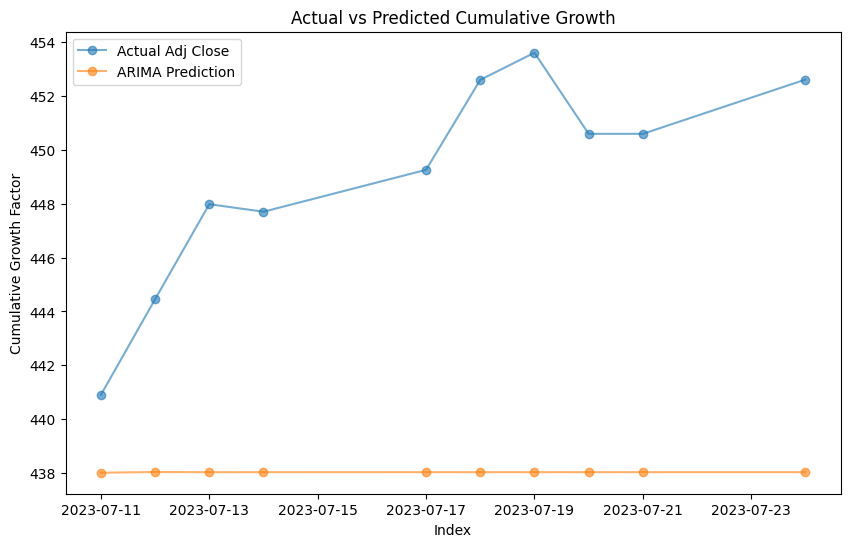

In [30]:
actual = X_test.Adj_close
preds = forecast_values

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(actual.index, actual, label='Actual Adj Close', marker='o', alpha=0.6)
plt.plot(actual.index, preds, label='ARIMA Prediction', marker='o', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Cumulative Growth Factor')
plt.title('Actual vs Predicted Cumulative Growth')
plt.legend()
plt.show()

# Work on different time horizions

# Windows dev for CNN model

# Testing New Horizon

In [ ]:
import yfinance as yf

In [ ]:
yf.download('MSFT', interval="2d")

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: Exception('%ticker%: Invalid input - interval=2d is not supported. Valid intervals: , 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
# load the features
ticker = "MSFT"
data = Data(tickers=[ticker], max=True, interval='1wk')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.historical['MSFT']

,Open,High,Low,Close,Adj_close,Volume
Date,,,,,,
1986-03-10,0.088542,0.102431,0.088542,0.100694,0.062427,1339948800
1986-03-17,0.100694,0.103299,0.091146,0.092882,0.057583,367257600
1986-03-24,0.092882,0.096354,0.089410,0.096354,0.059736,136972800
1986-03-31,0.096354,0.098958,0.093750,0.096354,0.059736,100598400
1986-04-07,0.096354,0.101563,0.092882,0.099826,0.061889,70070400
...,...,...,...,...,...,...
2023-10-30,333.410004,354.390015,331.829987,352.799988,352.085388,119224300
2023-11-06,353.450012,370.100006,353.350006,369.670013,368.921234,129319400
2023-11-13,368.220001,376.350006,365.899994,369.850006,369.100861,141869800


In [ ]:
FEATURES, TARGET = data.feature_matrix(ticker, target='dummy', leak=False, scale=True)

In [ ]:
TARGET

Date
1990-12-24    0
1990-12-31    0
1991-01-07    1
1991-01-14    1
1991-01-21    1
             ..
2023-10-30    1
2023-11-06    0
2023-11-13    0
2023-11-20    1
2023-11-27    0
Name: TARGET, Length: 1719, dtype: int64